In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

plt.rcParams["figure.figsize"] = (6, 6)

In [2]:
df_recipes = pd.read_csv("../data/raw/PP_recipes.csv")
df_users = pd.read_csv("../data/raw/PP_users.csv")

df_raw_recipes = pd.read_csv("../data/raw/RAW_recipes.csv")
df_raw_interactions = pd.read_csv("../data/raw/RAW_interactions.csv")

with open("../data/raw/ingr_map.pkl", "rb") as file:
    ingr_map = pickle.load(file)

In [3]:
ingr_map

raw_ingr  raw_words  \
0      medium heads bibb or red leaf lettuce, washed,...         13   
1                  mixed baby lettuces and spring greens          6   
2                                   romaine lettuce leaf          3   
3                                   iceberg lettuce leaf          3   
4                                    red romaine lettuce          3   
...                                                  ...        ...   
11654                                           soybeans          1   
11655                                              goose          1   
11656                                             ajwain          1   
11657                                           brinjals          1   
11658                                              khoya          1   

                                               processed  len_proc replaced  \
0      medium heads bibb or red leaf lettuce, washed,...        73  lettuce   
1                   mixed baby lettuces and spring green        36  lettuce   
2                                   romaine lettuce leaf        20  lettuce   
3                                   iceberg lettuce leaf        20  lettuce   
4                                    red romaine lettuce        19  lettuce   
...                                                  ...       ...      ...   
11654                                            soybean         7  soybean   
11655                                              goose         5    goose   
11656                                             ajwain         6   ajwain   
11657                                            brinjal         7  brinjal   
11658                                              khoya         5    khoya   

       count    id  
0       4507  4308  
1       4507  4308  
2       4507  4308  
3       4507  4308  
4       4507  4308  
...      ...   ...  
11654     31  6702  
11655      8  3318  
11656     13    47  
11657      2   750  
11658      6  4061  

[11659 rows x 7 columns]

In [4]:
df_recipes.head()

id       i                                        name_tokens  \
0  424415      23  [40480, 37229, 2911, 1019, 249, 6878, 6878, 28...   
1  146223   96900       [40480, 18376, 7056, 246, 1531, 2032, 40481]   
2  312329  120056     [40480, 21044, 16954, 8294, 556, 10837, 40481]   
3   74301  168258                       [40480, 10025, 31156, 40481]   
4   76272  109030  [40480, 17841, 252, 782, 2373, 1641, 2373, 252...   

                                   ingredient_tokens  \
0  [[2911, 1019, 249, 6878], [1353], [6953], [153...   
1  [[17918], [25916], [2507, 6444], [8467, 1179],...   
2  [[5867, 24176], [1353], [6953], [1301, 11332],...   
3  [[1270, 1645, 28447], [21601], [27952, 29471, ...   
4  [[1430, 11434], [1430, 17027], [1615, 23, 695,...   

                                        steps_tokens  \
0  [40480, 40482, 21662, 481, 6878, 500, 246, 161...   
1  [40480, 40482, 729, 2525, 10906, 485, 43, 8393...   
2  [40480, 40482, 8240, 481, 24176, 296, 1353, 66...   
3  [40480, 40482, 5539, 21601, 1073, 903, 2324, 4...   
4  [40480, 40482, 14046, 1430, 11434, 488, 17027,...   

                                          techniques  calorie_level  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...              0   
1  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...              0   
2  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...              1   
3  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...              0   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...              0   

                                      ingredient_ids  
0                      [389, 7655, 6270, 1527, 3406]  
1  [2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...  
2  [1257, 7655, 6270, 590, 5024, 1119, 4883, 6696...  
3   [7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]  
4                            [3484, 6324, 7594, 243]

In [5]:
df_users.head()

u                                         techniques  \
0  0  [8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...   
1  1  [11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...   
2  2  [13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...   
3  3  [498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...   
4  4  [161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...   

                                               items  n_items  \
0  [1118, 27680, 32541, 137353, 16428, 28815, 658...       31   
1  [122140, 77036, 156817, 76957, 68818, 155600, ...       39   
2  [168054, 87218, 35731, 1, 20475, 9039, 124834,...       27   
3  [163193, 156352, 102888, 19914, 169438, 55772,...     1513   
4  [72857, 38652, 160427, 55772, 119999, 141777, ...      376   

                                             ratings  n_ratings  
0  [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...         31  
1  [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...         39  
2  [3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...         27  
3  [5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...       1513  
4  [5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...        376

In [6]:
df_raw_recipes.head()

name      id  minutes  \
0  arriba   baked winter squash mexican style  137739       55   
1            a bit different  breakfast pizza   31490       30   
2                   all in the kitchen  chili  112140      130   
3                          alouette  potatoes   59389       45   
4          amish  tomato ketchup  for canning   44061      190   

   contributor_id   submitted  \
0           47892  2005-09-16   
1           26278  2002-06-17   
2          196586  2005-02-25   
3           68585  2003-04-14   
4           41706  2002-10-25   

                                                tags  \
0  ['60-minutes-or-less', 'time-to-make', 'course...   
1  ['30-minutes-or-less', 'time-to-make', 'course...   
2  ['time-to-make', 'course', 'preparation', 'mai...   
3  ['60-minutes-or-less', 'time-to-make', 'course...   
4  ['weeknight', 'time-to-make', 'course', 'main-...   

                                    nutrition  n_steps  \
0       [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1   [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
2  [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6   
3   [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11   
4   [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5   

                                               steps  \
0  ['make a choice and proceed with recipe', 'dep...   
1  ['preheat oven to 425 degrees f', 'press dough...   
2  ['brown ground beef in large pot', 'add choppe...   
3  ['place potatoes in a large pot of lightly sal...   
4  ['mix all ingredients& boil for 2 1 / 2 hours ...   

                                         description  \
0  autumn is my favorite time of year to cook! th...   
1  this recipe calls for the crust to be prebaked...   
2  this modified version of 'mom's' chili was a h...   
3  this is a super easy, great tasting, make ahea...   
4  my dh's amish mother raised him on this recipe...   

                                         ingredients  n_ingredients  
0  ['winter squash', 'mexican seasoning', 'mixed ...              7  
1  ['prepared pizza crust', 'sausage patty', 'egg...              6  
2  ['ground beef', 'yellow onions', 'diced tomato...             13  
3  ['spreadable cheese with garlic and herbs', 'n...             11  
4  ['tomato juice', 'apple cider vinegar', 'sugar...              8

In [7]:
df_raw_interactions.head()

user_id  recipe_id        date  rating  \
0    38094      40893  2003-02-17       4   
1  1293707      40893  2011-12-21       5   
2     8937      44394  2002-12-01       4   
3   126440      85009  2010-02-27       5   
4    57222      85009  2011-10-01       5   

                                              review  
0  Great with a salad. Cooked on top of stove for...  
1  So simple, so delicious! Great for chilly fall...  
2  This worked very well and is EASY.  I used not...  
3  I made the Mexican topping and took it to bunk...  
4  Made the cheddar bacon topping, adding a sprin...

In [8]:
# rating distribution
df_raw_interactions["rating"].value_counts(normalize=True)

5    0.720936
4    0.165459
0    0.053734
3    0.036079
2    0.012472
1    0.011320
Name: rating, dtype: float64

In [9]:
# ratings number
df_raw_interactions.shape[0]

1132367

In [10]:
# users number
df_users.shape[0]

25076

# Rating feature analysis

num ratings per user mean: 27.871311213909713
median: 6.0
std: 122.72903852860995


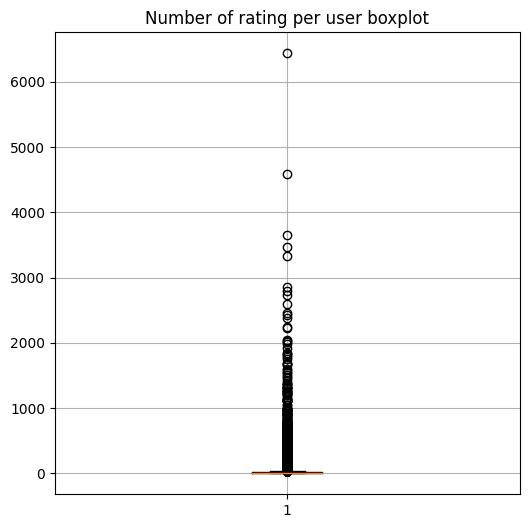

In [11]:
# average num of ratings per user
num_ratings_per_user = df_users["ratings"].apply(lambda x: len(json.loads(x)))

plt.boxplot(num_ratings_per_user)
plt.title("Number of rating per user boxplot")
plt.grid()

print(f"num ratings per user mean: {num_ratings_per_user.mean()}\n"
      f"median: {num_ratings_per_user.median()}\n"
      f"std: {num_ratings_per_user.std()}"
      )

mean rating per user mean: 4.451941452404273
median: 4.666666666666667
std: 0.7238250353776238


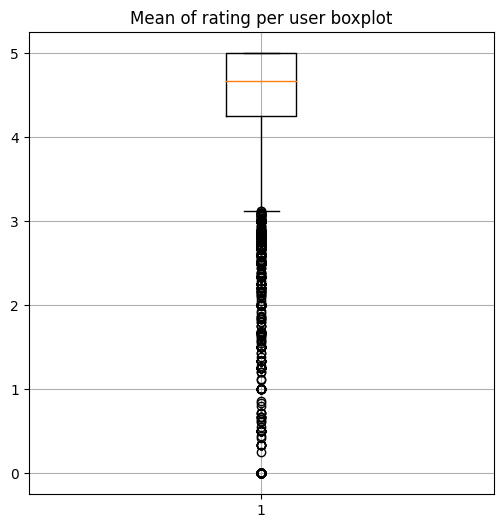

In [12]:
# average num of ratings per user
from statistics import mean

mean_ratings_per_user = df_users["ratings"].apply(lambda x: mean(json.loads(x)))

plt.boxplot(mean_ratings_per_user)
plt.title("Mean of rating per user boxplot")
plt.grid()

print(f"mean rating per user mean: {mean_ratings_per_user.mean()}\n"
      f"median: {mean_ratings_per_user.median()}\n"
      f"std: {mean_ratings_per_user.std()}"
      )

mean conditioned rating per user mean: 4.535458667081883
median: 4.60377358490566
std: 0.36877305170741087


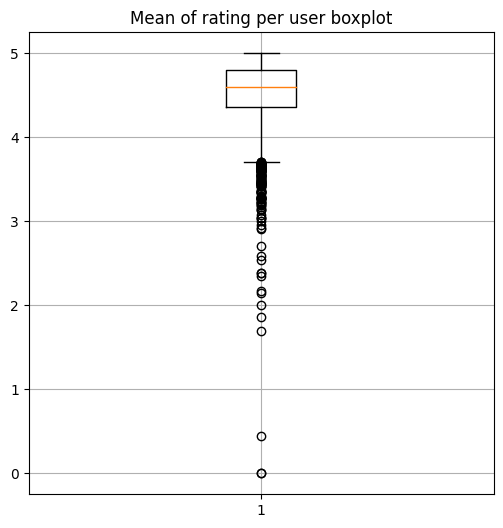

In [13]:
# average num of ratings per user
from statistics import mean

min_num_ratings = 20
mask_users = num_ratings_per_user >= min_num_ratings

mean_ratings_per_user_conditioned = mean_ratings_per_user[mask_users]

plt.boxplot(mean_ratings_per_user_conditioned)
plt.title("Mean of rating per user boxplot")
plt.grid()

print(f"mean conditioned rating per user mean: {mean_ratings_per_user_conditioned.mean()}\n"
      f"median: {mean_ratings_per_user_conditioned.median()}\n"
      f"std: {mean_ratings_per_user_conditioned.std()}"
      )

# Ingredients analysis

In [14]:
ingr_map.head()

raw_ingr  raw_words  \
0  medium heads bibb or red leaf lettuce, washed,...         13   
1              mixed baby lettuces and spring greens          6   
2                               romaine lettuce leaf          3   
3                               iceberg lettuce leaf          3   
4                                red romaine lettuce          3   

                                           processed  len_proc replaced  \
0  medium heads bibb or red leaf lettuce, washed,...        73  lettuce   
1               mixed baby lettuces and spring green        36  lettuce   
2                               romaine lettuce leaf        20  lettuce   
3                               iceberg lettuce leaf        20  lettuce   
4                                red romaine lettuce        19  lettuce   

   count    id  
0   4507  4308  
1   4507  4308  
2   4507  4308  
3   4507  4308  
4   4507  4308

In [15]:
ingr_map["replaced"].value_counts()

dressing                163
sausage                 154
chile                    99
cake mix                 85
cheddar                  84
                       ... 
sliced olife              1
spicy tomato salsa        1
mexican blend cheese      1
ham soup base             1
khoya                     1
Name: replaced, Length: 8023, dtype: int64

In [16]:
# ingredients number
ingr_map["replaced"].value_counts().sum()

11659

In [17]:
# nonunique ingredients number
((ingr_map["replaced"].value_counts() >= 2).sum(),
(ingr_map["replaced"].value_counts() >= 5).sum(),
)

(1573, 122)

In [18]:
df_recipes.shape[0]

178265

In [19]:
# rated recipes ratio
num_ratings = df_users["ratings"].apply(lambda x: len(json.loads(x))).sum()
num_users = df_users["u"].sum()

num_ratings, num_users, num_ratings / (num_ratings * num_users)

(698901, 314390350, 3.180759205872572e-09)

In [20]:
# num active users
df_users["ratings"].apply(lambda x: len(json.loads(x)) >= 5).sum()

15061